(click to navigate)

[Classification, centered-objects](#Classification,-centered-objects)  
[Classification, moving-objects](#Classification,-moving-objects)  
[Triangle edge detection](#Triangle-edge-detection)  
[Denoising Autoencoder](#Denoising-Autoencoder)

Let us import all the code from `mp1.py`

In [1]:
!wget https://raw.githubusercontent.com/gabsens/Deep-Learning-MVA/master/HW1/mp1.py
%run mp1.py

--2018-12-20 16:22:44--  https://raw.githubusercontent.com/gabsens/Deep-Learning-MVA/master/HW1/mp1.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4078 (4.0K) [text/plain]
Saving to: ‘mp1.py.1’

mp1.py.1            100%[===================>]   3.98K  --.-KB/s    in 0s      

2018-12-20 16:22:44 (84.0 MB/s) - ‘mp1.py.1’ saved [4078/4078]



Using TensorFlow backend.


We define two callbacks that will prove useful in reducing the size of the verbose when training networks with Keras. We print training statistics every 10 epochs instead of every epochs.

In [2]:
from keras import callbacks
class Verbose_classification(callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.epoch = 0

    def on_epoch_end(self, epoch, logs={}):
        self.epoch = self.epoch + 1
        if self.epoch==1 or (self.epoch%10==0):
            print('Epoch:'+ str(self.epoch),
                  'loss:', '%.4f' % logs['loss'],
                  'acc:', '%.4f' % logs['acc'],
                  'val_loss:', '%.4f' % logs['val_loss'],
                  'val_acc:', '%.4f' % logs['val_acc'],
                 )
            
class Verbose_regression(callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.epoch = 0

    def on_epoch_end(self, epoch, logs={}):
        self.epoch = self.epoch + 1
        if self.epoch==1 or (self.epoch%10==0):
            print('Epoch:'+ str(self.epoch),
                  'loss:', '%.4f' % logs['loss'],
                  'val_loss:', '%.4f' % logs['val_loss']
                 )

Let us have a look at the shapes generated by each function.

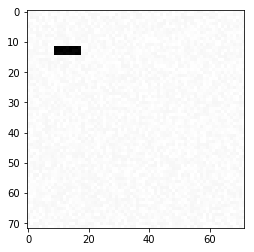

In [3]:
im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

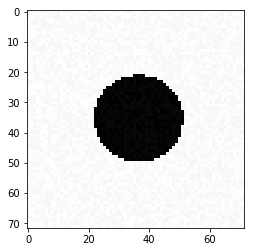

In [4]:
im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

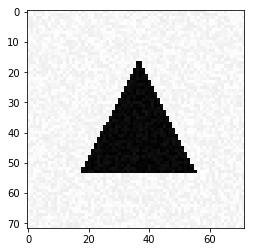

In [5]:
[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

# Classification, centered objects

In [6]:
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras import optimizers

[X_train, Y_train] = generate_dataset_classification(300, 20)
Y_train = to_categorical(Y_train)


def generate_valid_set_classification():
    [X_val, Y_val] = generate_dataset_classification(300, 20, False)
    Y_val = to_categorical(Y_val, 3) 
    return [X_val, Y_val]

[X_val, Y_val] = generate_valid_set_classification()

Creating data
Creating data


We train a basic linear classifier in the form of a network without any hidden layer. Since there are 3 classes, the output layer has 3 units and the activation function is softmax.

No hidden layer, training with SGD

In [7]:
network = models.Sequential()
network.add(layers.Dense(3, input_shape=(72*72,), activation='softmax'))  

network.compile(optimizer=optimizers.SGD(lr=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

output = Verbose_classification()
batch_size = 30
history_sgd = network.fit(X_train, Y_train, epochs=30, batch_size=batch_size, validation_data=(X_val, Y_val),
                          verbose=0, callbacks=[output])

Epoch:1 loss: 1.1700 acc: 0.3533 val_loss: 1.0717 val_acc: 0.3967
Epoch:10 loss: 0.6616 acc: 0.7567 val_loss: 0.6675 val_acc: 0.7333
Epoch:20 loss: 0.5060 acc: 0.8367 val_loss: 0.5094 val_acc: 0.8333
Epoch:30 loss: 0.4027 acc: 0.8933 val_loss: 0.4362 val_acc: 0.8333


No hidden layer, training with Adam

In [8]:
network = models.Sequential()
network.add(layers.Dense(3, input_shape=(72*72,), activation='softmax'))  

network.compile(optimizer=optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

output = Verbose_classification()
batch_size = 30
history_adam = network.fit(X_train, Y_train, epochs=30, batch_size=batch_size, validation_data=(X_val, Y_val),
                           verbose=0, callbacks=[output])

Epoch:1 loss: 1.4558 acc: 0.4867 val_loss: 1.3018 val_acc: 0.4000
Epoch:10 loss: 0.1599 acc: 0.9933 val_loss: 0.1630 val_acc: 0.9967
Epoch:20 loss: 0.0742 acc: 0.9967 val_loss: 0.0939 val_acc: 1.0000
Epoch:30 loss: 0.0429 acc: 0.9967 val_loss: 0.0546 val_acc: 1.0000


We plot the evolution of the training and validation accuracies for each epoch. 

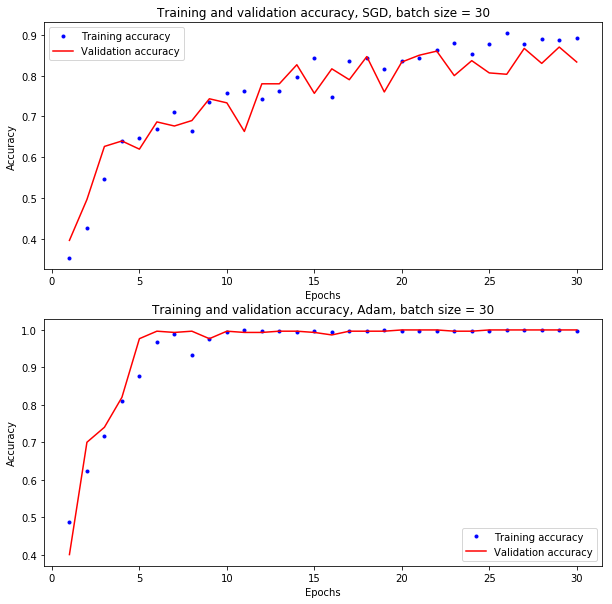

In [9]:
f, axarr = plt.subplots(2, 1, figsize = (10,10))

ax = axarr.flatten()[0]
history_dict = history_sgd.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(history_sgd.epoch) + 1)
ax.plot(epochs, acc_values, 'b.', label='Training accuracy')
ax.plot(epochs, val_acc_values, 'r', label='Validation accuracy')

ax.set_title('Training and validation accuracy, '+ 'SGD, '+ 'batch size = '+str(batch_size))
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend()

ax = axarr.flatten()[1]
history_dict = history_adam.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(history_adam.epoch) + 1)
ax.plot(epochs, acc_values, 'b.', label='Training accuracy')
ax.plot(epochs, val_acc_values, 'r', label='Validation accuracy')

ax.set_title('Training and validation accuracy, '+ 'Adam, '+ 'batch size = '+str(batch_size))
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend()

plt.show()

The network successfully discriminates between the three classes. Using the Adam optimizer allows for much faster training.

### Plotting weights learned for each category

In [10]:
#0: rect, 1: disk, 2:triangle
def normalize(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))

rect = network.get_weights()[0][:,0].reshape(72,72)
rect = normalize(rect)

disk = network.get_weights()[0][:,1].reshape(72,72)
disk = normalize(disk)

tri = network.get_weights()[0][:,2].reshape(72,72)
tri = normalize(tri)

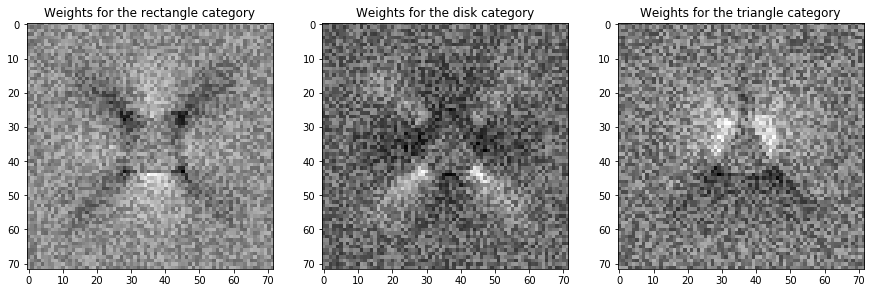

In [11]:
f, axarr = plt.subplots(1, 3, figsize = (15,15))

ax = axarr.flatten()[0]
ax.imshow(rect, cmap='gray')
ax.set_title('Weights for the rectangle category')

ax = axarr.flatten()[1]
ax.imshow(disk, cmap='gray')
ax.set_title('Weights for the disk category')

ax = axarr.flatten()[2]
ax.imshow(tri, cmap='gray')
ax.set_title('Weights for the triangle category')

plt.show()

We normalize the weights of each category so that they lie in the interval $[0,1]$.  
When we display the weights of a given category as an image, the outline of the corresponding shape is visible. 

# Classification, moving objects

In [12]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True)
Y_train = to_categorical(Y_train)

def generate_valid_set_classification():
    [X_val, Y_val] = generate_dataset_classification(300, 20, True)
    Y_val = to_categorical(Y_val, 3) 
    return [X_val, Y_val]

[X_val, Y_val] = generate_valid_set_classification()

Creating data
Creating data


### We try the same linear model as before.

Training with SGD.

In [13]:
network = models.Sequential()
network.add(layers.Dense(3, input_shape=(72*72,), activation='softmax'))  

network.compile(optimizer=optimizers.SGD(lr=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])


output = Verbose_classification()
batch_size = 30
history_sgd = network.fit(X_train, Y_train, epochs=60, batch_size=batch_size, validation_data=(X_val, Y_val),
                           verbose=0, callbacks=[output])

Epoch:1 loss: 1.1161 acc: 0.4000 val_loss: 1.1236 val_acc: 0.3967
Epoch:10 loss: 0.9559 acc: 0.5167 val_loss: 1.1704 val_acc: 0.3800
Epoch:20 loss: 0.9034 acc: 0.5367 val_loss: 1.0512 val_acc: 0.4067
Epoch:30 loss: 0.8049 acc: 0.6233 val_loss: 1.0390 val_acc: 0.4167
Epoch:40 loss: 0.8025 acc: 0.6167 val_loss: 0.9565 val_acc: 0.4900
Epoch:50 loss: 0.7667 acc: 0.6267 val_loss: 0.9079 val_acc: 0.5000
Epoch:60 loss: 0.7282 acc: 0.6400 val_loss: 0.9197 val_acc: 0.4800


Training with Adam.

In [14]:
network = models.Sequential()
network.add(layers.Dense(3, input_shape=(72*72,), activation='softmax'))  

network.compile(optimizer=optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

output = Verbose_classification()
batch_size = 30
history_adam = network.fit(X_train, Y_train, epochs=60, batch_size=batch_size, validation_data=(X_val, Y_val),
                           verbose=0, callbacks=[output])

Epoch:1 loss: 2.1459 acc: 0.2967 val_loss: 1.5500 val_acc: 0.3533
Epoch:10 loss: 0.8124 acc: 0.6100 val_loss: 1.0176 val_acc: 0.4767
Epoch:20 loss: 0.6795 acc: 0.6867 val_loss: 0.9987 val_acc: 0.4900
Epoch:30 loss: 0.6455 acc: 0.6867 val_loss: 0.8859 val_acc: 0.5167
Epoch:40 loss: 0.7284 acc: 0.6133 val_loss: 1.2394 val_acc: 0.4633
Epoch:50 loss: 0.5028 acc: 0.7733 val_loss: 1.1100 val_acc: 0.5033
Epoch:60 loss: 0.4621 acc: 0.8200 val_loss: 1.0498 val_acc: 0.4900


We plot the evolution of the training and validation accuracies for each epoch. 

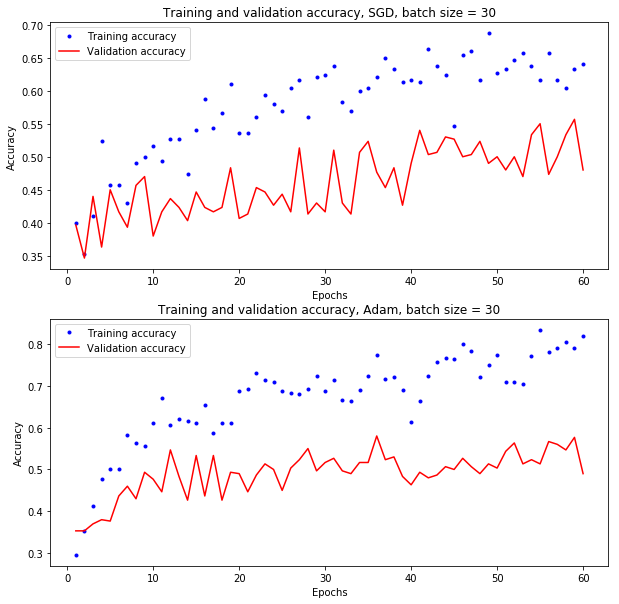

In [15]:
f, axarr = plt.subplots(2, 1, figsize = (10,10))

ax = axarr.flatten()[0]
history_dict = history_sgd.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(history_sgd.epoch) + 1)
ax.plot(epochs, acc_values, 'b.', label='Training accuracy')
ax.plot(epochs, val_acc_values, 'r', label='Validation accuracy')

ax.set_title('Training and validation accuracy, '+ 'SGD, '+ 'batch size = '+str(batch_size))
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend()

ax = axarr.flatten()[1]
history_dict = history_adam.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(history_adam.epoch) + 1)
ax.plot(epochs, acc_values, 'b.', label='Training accuracy')
ax.plot(epochs, val_acc_values, 'r', label='Validation accuracy')

ax.set_title('Training and validation accuracy, '+ 'Adam, '+ 'batch size = '+str(batch_size))
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend()

plt.show()

The training accuracy does not exceed $80\%$ and the validation accuracy stays under $60\%$, implying that linear models are not complex enough for this task.

### We try a Convolution Neural Network.

In [16]:
[X_train, Y_train] = generate_dataset_classification(10000, 20, True)
Y_train = to_categorical(Y_train)

def generate_valid_set_classification():
    [X_val, Y_val] = generate_dataset_classification(10000, 20, True)
    Y_val = to_categorical(Y_val, 3) 
    return [X_val, Y_val]

[X_val, Y_val] = generate_valid_set_classification()
#Generating that much data is a bit long, please be patient (~10 minutes)

Creating data
Creating data


Training a CNN with SGD

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(72,72,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer=optimizers.SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

output = Verbose_classification()
batch_size = 100
history_sgd = model.fit(X_train.reshape((10000,72,72,1)), Y_train, epochs=20, batch_size=batch_size,
                          validation_data=(X_val.reshape((10000,72,72,1)), Y_val),
                           verbose=0, callbacks=[output])

Epoch:1 loss: 1.0840 acc: 0.3955 val_loss: 1.0677 val_acc: 0.4419
Epoch:10 loss: 0.6301 acc: 0.7293 val_loss: 0.6085 val_acc: 0.7240
Epoch:20 loss: 0.1462 acc: 0.9482 val_loss: 0.1370 val_acc: 0.9484


Training a CNN with Adam

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(72,72,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

output = Verbose_classification()
batch_size = 100
history_adam = model.fit(X_train.reshape((10000,72,72,1)), Y_train, epochs=20, batch_size=batch_size,
                          validation_data=(X_val.reshape((10000,72,72,1)), Y_val),
                           verbose=0, callbacks=[output])

Epoch:1 loss: 0.4499 acc: 0.8113 val_loss: 0.1007 val_acc: 0.9617
Epoch:10 loss: 0.0057 acc: 0.9985 val_loss: 0.0065 val_acc: 0.9984
Epoch:20 loss: 0.0013 acc: 0.9995 val_loss: 0.0067 val_acc: 0.9979


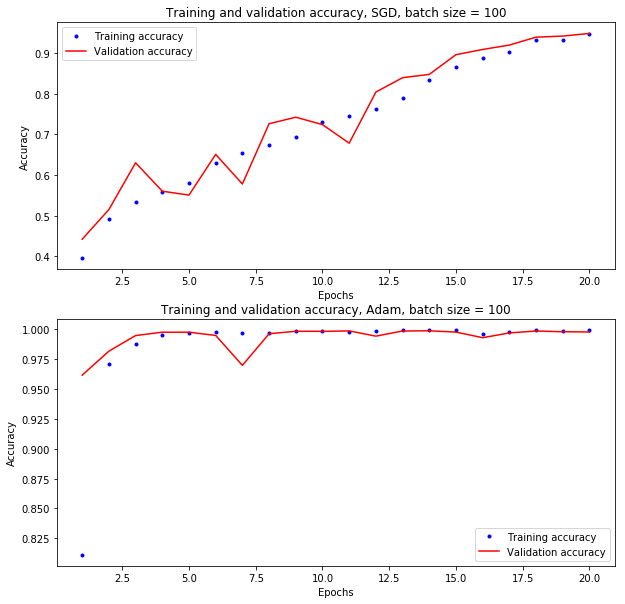

In [19]:
f, axarr = plt.subplots(2, 1, figsize = (10,10))

ax = axarr.flatten()[0]
history_dict = history_sgd.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(history_sgd.epoch) + 1)
ax.plot(epochs, acc_values, 'b.', label='Training accuracy')
ax.plot(epochs, val_acc_values, 'r', label='Validation accuracy')

ax.set_title('Training and validation accuracy, '+ 'SGD, '+ 'batch size = '+str(batch_size))
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend()

ax = axarr.flatten()[1]
history_dict = history_adam.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(history_adam.epoch) + 1)
ax.plot(epochs, acc_values, 'b.', label='Training accuracy')
ax.plot(epochs, val_acc_values, 'r', label='Validation accuracy')

ax.set_title('Training and validation accuracy, '+ 'Adam, '+ 'batch size = '+str(batch_size))
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend()

plt.show()

Unlike the linear network, a CNN perfectly discriminates between the three moving objects.  
Besides, we observe the same behaviour as before: training with Adam is much faster.

# Triangle edge detection

We are now faced with a regression task: predicting the location of the edges of a 2D triangle. For the model to learn something we have to normalize the triangles beforehand. We have come up with two ways of doing this: either sorting the vertices according to their y coordinate or sorting the vertices according to their distance to the origin.

### Sorting vertices according to their y coordinate.

In [20]:
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras import optimizers
from itertools import permutations

def sort_y(vertices):
    Y_temp = np.array(vertices)
    Y_temp = Y_temp.reshape((3, 2))
    Y_temp = Y_temp[Y_temp[:,-1].argsort()].flatten()
    return Y_temp


[X_train, Y_train] = generate_dataset_regression(3000, 20)
Y_train_1 = np.array([sort_y(vertices) for vertices in Y_train])
[X_val, Y_val] = generate_dataset_regression(300, 20)
Y_val_1 = np.array([sort_y(vertices) for vertices in Y_val])

Creating data
Creating data


We train a CNN with some dropout to mitigate overfitting. The loss we chose is the mean absolute error because the results were visually more compelling than those obtained with the mean squared error.

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(72, 72, 1), padding='same'))
model.add(layers.MaxPooling2D(pool_size=(4, 4), padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding='same'))
model.add(layers.MaxPooling2D(pool_size=(4, 4), padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation="relu", padding='same'))
model.add(layers.MaxPooling2D(pool_size=(4, 4), padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation="relu", padding='same'))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(6))

output = Verbose_regression()
model.compile(optimizer='adam', loss='mae')
model.fit(X_train.reshape((3000,72,72,1)),Y_train_1, epochs=120, batch_size=100,
          validation_data=(X_val.reshape((300,72,72,1)), Y_val_1),
          verbose=0, callbacks=[output])

Epoch:1 loss: 0.2472 val_loss: 0.1851
Epoch:10 loss: 0.0976 val_loss: 0.0687
Epoch:20 loss: 0.0697 val_loss: 0.0487
Epoch:30 loss: 0.0595 val_loss: 0.0431
Epoch:40 loss: 0.0541 val_loss: 0.0388
Epoch:50 loss: 0.0516 val_loss: 0.0392
Epoch:60 loss: 0.0495 val_loss: 0.0357
Epoch:70 loss: 0.0482 val_loss: 0.0367
Epoch:80 loss: 0.0475 val_loss: 0.0371
Epoch:90 loss: 0.0466 val_loss: 0.0340
Epoch:100 loss: 0.0454 val_loss: 0.0346
Epoch:110 loss: 0.0448 val_loss: 0.0344
Epoch:120 loss: 0.0444 val_loss: 0.0324


We get the predictions on the validation set and visualise them below.

In [22]:
Y_pred = model.predict(X_val.reshape((300,72,72,1)))

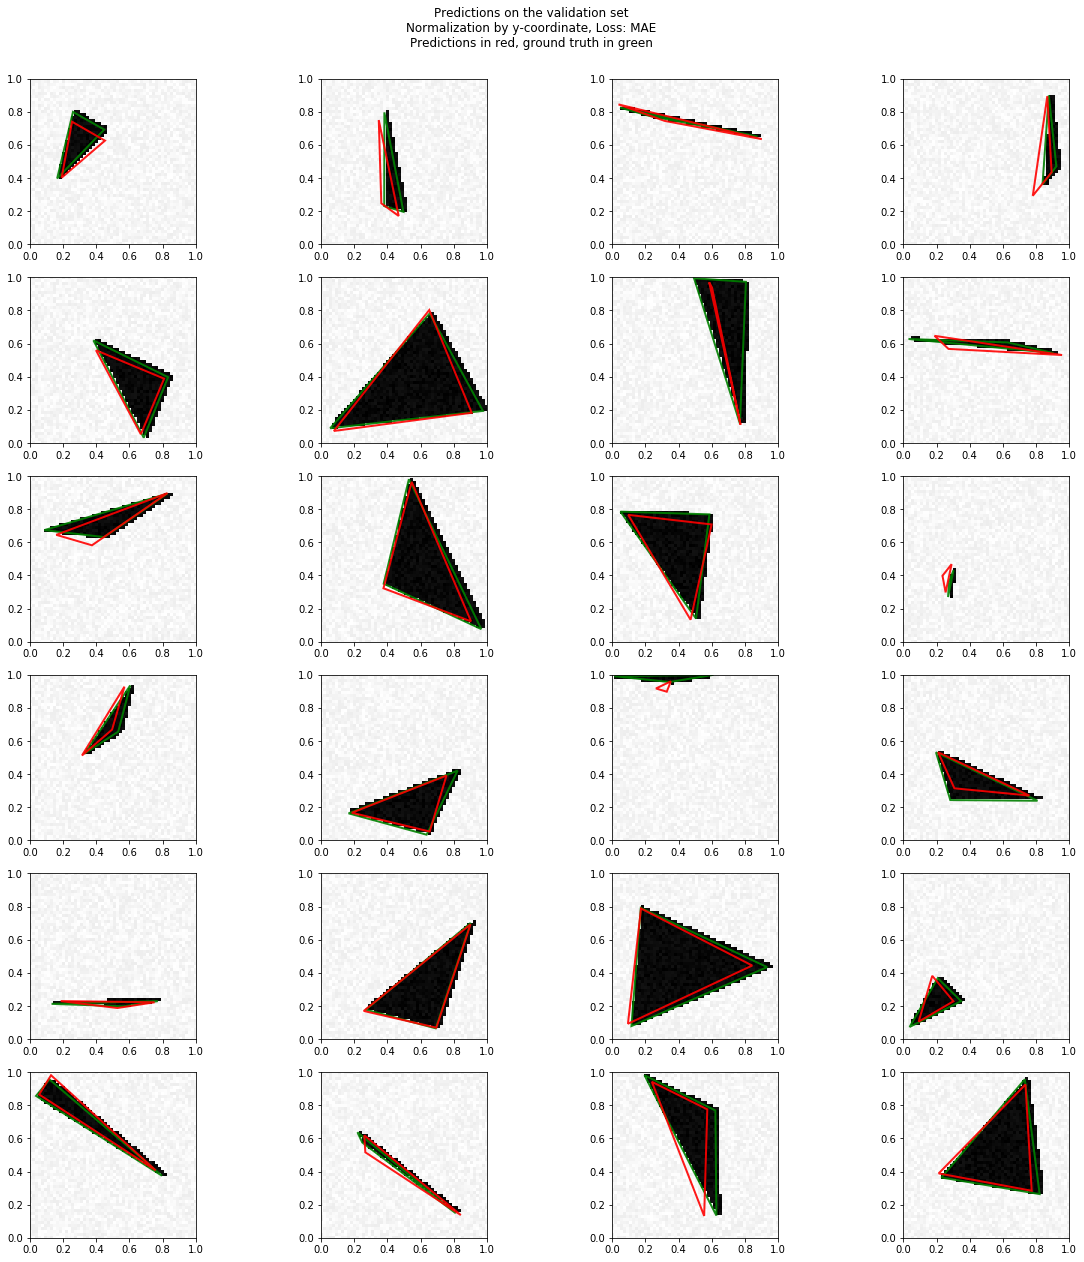

In [23]:
def visualize_prediction2(X, Y, Z, title):
    fig, axes = plt.subplots(6, 4, figsize=(20, 20))
    fig.suptitle(title)
    axes = axes.flatten()
    for i in range(24):
        ax = axes[i]
        x, y, z = X[i], Y[i], Z[i]
        I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
        ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
        ax.set_xlim([0,1])
        ax.set_ylim([0,1])

        xz = z.reshape(3,2)
        tri = patches.Polygon(xz, closed=True, fill = False, edgecolor = 'g', linewidth = 2, alpha = 0.9)
        ax.add_patch(tri)
        
        xy = y.reshape(3,2)
        tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 2, alpha = 0.9)
        ax.add_patch(tri)
    
    fig.subplots_adjust(top=0.93)
    plt.show()


visualize_prediction2(X_val, Y_pred, Y_val_1, '''Predictions on the validation set
Normalization by y-coordinate, Loss: MAE
Predictions in red, ground truth in green''')

The results are satisfying, except for triangles that are too small or too flat.

### Sort vertices according to their distance to the origin.

In [24]:
def sort_dist(vertices):
    Y_temp = np.array(vertices)
    Y_temp = Y_temp.reshape((3, 2))
    Y_temp = np.c_[Y_temp, np.linalg.norm(Y_temp, axis=1)]   
    Y_temp = Y_temp[Y_temp[:,-1].argsort()][:,:-1].flatten()
    return Y_temp


Y_train_2 = np.array([sort_dist(vertices) for vertices in Y_train])
Y_val_2 = np.array([sort_dist(vertices) for vertices in Y_val])

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(72, 72, 1), padding='same'))
model.add(layers.MaxPooling2D(pool_size=(4, 4), padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding='same'))
model.add(layers.MaxPooling2D(pool_size=(4, 4), padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation="relu", padding='same'))
model.add(layers.MaxPooling2D(pool_size=(4, 4), padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation="relu", padding='same'))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(6))

output = Verbose_regression()
model.compile(optimizer='adam', loss='mae')
model.fit(X_train.reshape((3000,72,72,1)),Y_train_2, epochs=120, batch_size=100,
          validation_data=(X_val.reshape((300,72,72,1)), Y_val_2),
          verbose=0, callbacks=[output])

Epoch:1 loss: 0.2706 val_loss: 0.2058
Epoch:10 loss: 0.1136 val_loss: 0.0882
Epoch:20 loss: 0.0766 val_loss: 0.0607
Epoch:30 loss: 0.0641 val_loss: 0.0566
Epoch:40 loss: 0.0570 val_loss: 0.0479
Epoch:50 loss: 0.0534 val_loss: 0.0481
Epoch:60 loss: 0.0514 val_loss: 0.0461
Epoch:70 loss: 0.0499 val_loss: 0.0445
Epoch:80 loss: 0.0493 val_loss: 0.0460
Epoch:90 loss: 0.0483 val_loss: 0.0460
Epoch:100 loss: 0.0478 val_loss: 0.0416
Epoch:110 loss: 0.0474 val_loss: 0.0426
Epoch:120 loss: 0.0459 val_loss: 0.0414


In [26]:
Y_pred = model.predict(X_val.reshape((300,72,72,1)))

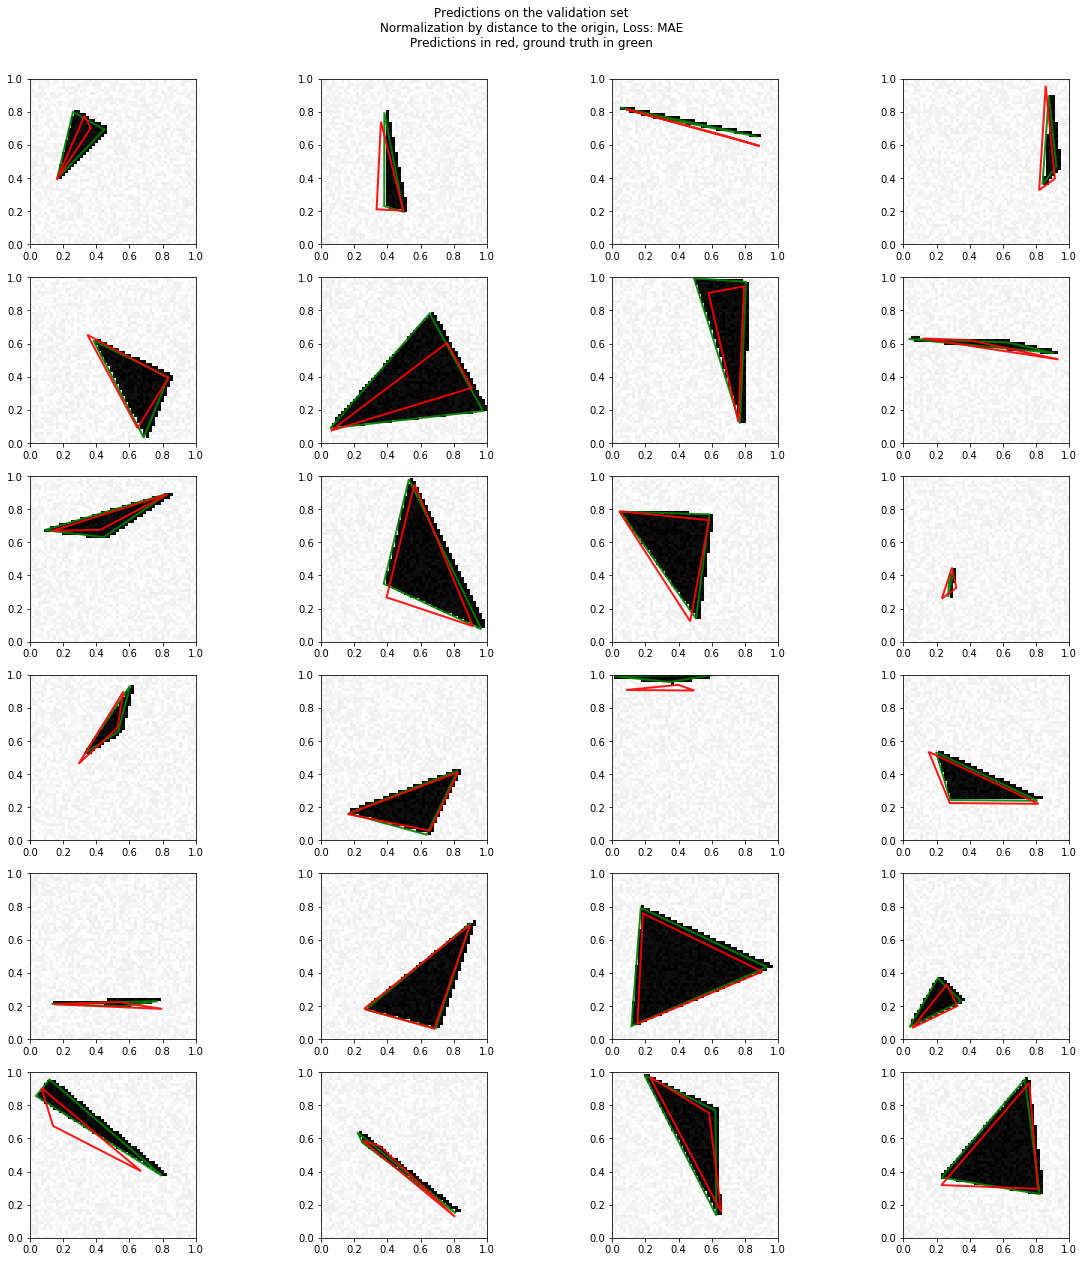

In [27]:
visualize_prediction2(X_val, Y_pred, Y_val_2,  '''Predictions on the validation set
Normalization by distance to the origin, Loss: MAE
Predictions in red, ground truth in green''')

Compared to the previous normalization, this method yields similar results.

# Denoising Autoencoder

We rewrite the generating functions so they provide both a noise-free and a noisy version of each object.

In [28]:
def generate_a_rectangle2(free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    noise = 10 + 20*np.random.random()
    
    return (generate_a_drawing(figsize, U, V, 0), 
            (generate_a_drawing(figsize, U, V, noise)+ noise) / (255 + 2 * noise))


def generate_a_disk2(free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    noise = 10 + 20*np.random.random()
    return (generate_a_drawing(figsize, U, V, 0), 
            (generate_a_drawing(figsize, U, V, noise)+ noise) / (255 + 2 * noise))



def generate_a_triangle2(free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    noise = 10 + 20*np.random.random()

    imdata = (generate_a_drawing(figsize, U, V, 0), 
              (generate_a_drawing(figsize, U, V, noise)+ noise) / (255 + 2 * noise))
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


def generate_dataset_denoising(nb_samples, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X_train = np.zeros([nb_samples,im_size])
    X_test = np.zeros([nb_samples,im_size])
    print('Creating data')
    for i in range(nb_samples):
        category = np.random.randint(3)
        if category == 0:
            X_test[i], X_train[i] = generate_a_rectangle2(free_location)
        elif category == 1: 
            X_test[i], X_train[i] = generate_a_disk2(free_location)
        else:
            [(X_test[i], X_train[i]), V] = generate_a_triangle2(free_location)
    return [X_train, X_test]


In [29]:
[X_train, X_test] = generate_dataset_denoising(1000, free_location=True)
[X_val, X_val2] = generate_dataset_denoising(300, free_location=True)

Creating data
Creating data


We train a convolutional autoencoder by following the architecture used in https://blog.keras.io/building-autoencoders-in-keras.html.

In [30]:
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(72, 72, 1), padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(layers.Conv2D(64, (3, 3), activation="relu", padding='same'))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding='same'))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.Conv2D(1, (3, 3), activation="sigmoid", padding='same'))

output = Verbose_regression()
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(X_train.reshape((1000,72,72,1))/255, X_test.reshape((1000,72,72,1))/255,
          epochs=90, batch_size=10, 
          validation_data=(X_val.reshape((300,72,72,1))/255, X_val2.reshape((300,72,72,1))/255),
          verbose=0, callbacks=[output])

Epoch:1 loss: 0.3494 val_loss: 0.2693
Epoch:10 loss: 0.0128 val_loss: 0.0136
Epoch:20 loss: 0.0068 val_loss: 0.0075
Epoch:30 loss: 0.0043 val_loss: 0.0049
Epoch:40 loss: 0.0035 val_loss: 0.0032
Epoch:50 loss: 0.0026 val_loss: 0.0026
Epoch:60 loss: 0.0024 val_loss: 0.0029
Epoch:70 loss: 0.0026 val_loss: 0.0025
Epoch:80 loss: 0.0015 val_loss: 0.0021
Epoch:90 loss: 0.0012 val_loss: 0.0017


In [31]:
X_pred = model.predict(X_val.reshape((300,72,72,1))/255)
X_pred = X_pred.reshape(300,72*72)

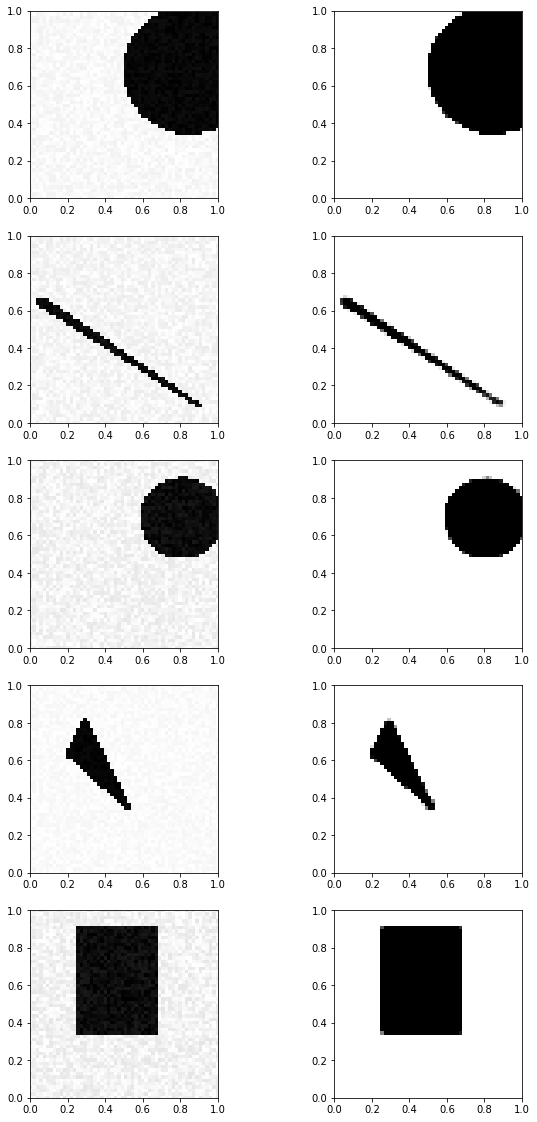

In [32]:
def visualize_prediction2(X, Y):
    fig, axes = plt.subplots(5, 2, figsize=(10, 20))
    axes = axes.flatten()
    for i in range(5):
        ax = axes[2*i]
        x = X[2*i]
        I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
        ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
        ax.set_xlim([0,1])
        ax.set_ylim([0,1])   
        ax = axes[2*i+1]
        y = Y[2*i]
        I = y.reshape((IMAGE_SIZE,IMAGE_SIZE))
        ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
        ax.set_xlim([0,1])
        ax.set_ylim([0,1])  
    plt.show()

visualize_prediction2(X_val, X_pred)

The results are satisfying. They get visually better when we add more epochs.